## Observations and Insights 

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata.head()
merged = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer')

# Display the data table for preview
merged.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [100]:
# Checking the number of mice.
len(merged['Mouse ID'].value_counts())



249

In [101]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged[merged.duplicated(['Mouse ID','Timepoint'])]
duplicates




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [102]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [103]:
merged = merged.drop_duplicates(['Mouse ID','Timepoint'],keep='last')

In [104]:
# Checking the number of mice in the clean DataFrame.
len(merged['Mouse ID'].value_counts())






249

## Summary Statistics

In [105]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_summary = merged.groupby('Drug Regimen')

#Calculate summary stats
mean = drug_summary['Tumor Volume (mm3)'].mean()
median = drug_summary['Tumor Volume (mm3)'].median()
stdev = drug_summary['Tumor Volume (mm3)'].std()
sem = drug_summary['Tumor Volume (mm3)'].sem()
variance = stdev ** 2
drug_summary_df = pd.DataFrame({'Mean':mean, 'Median':median,'Variance':variance,'Standard Deviation':stdev,'SEM':sem})
drug_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary['Tumor Volume (mm3)'].agg({'mean','median','var','std','sem'})


,median,mean,var,std,sem
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.776157,52.591172,39.290177,6.268188,0.469821
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.698743,55.235638,68.553577,8.279709,0.603860
Naftisol,52.509285,54.331565,66.173479,8.134708,0.596466
Placebo,52.288934,54.033581,61.168083,7.821003,0.581331
Propriva,50.783528,52.382993,43.220205,6.574208,0.526358
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.431737,54.233149,59.450562,7.710419,0.573111


## Bar and Pie Charts

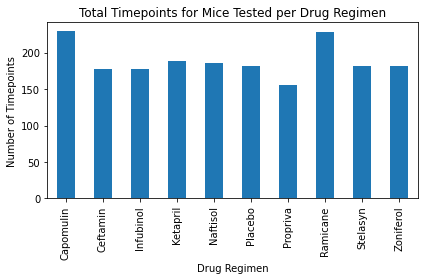

In [108]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_group = merged.groupby('Drug Regimen')
time_count = drug_group['Timepoint'].count()
time_count_chart = time_count.plot(kind='bar',ylabel='Number of Timepoints',title='Total Timepoints for Mice Tested per Drug Regimen')
plt.tight_layout()
plt.show()



In [109]:
##Change our groupby object into a dataframe for ease of use
time_count_df = pd.DataFrame(data=time_count)
time_count_df =time_count_df.reset_index()
time_count_df

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


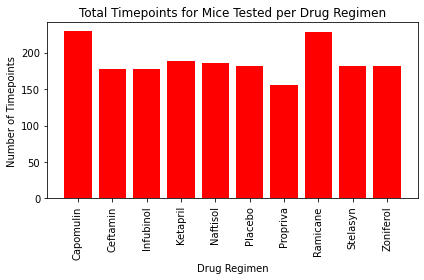

In [110]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(0,len(time_count))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,time_count_df['Timepoint'],color='r',align='center')
plt.xticks(tick_locations,time_count_df['Drug Regimen'],rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Timepoints for Mice Tested per Drug Regimen')
plt.tight_layout()
plt.show()


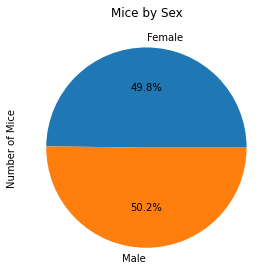

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = merged.groupby('Sex')
sex_count = sex_group['Mouse ID'].nunique()
sex_plot = sex_count.plot(kind='pie',ylabel='Number of Mice',title='Mice by Sex',autopct= '%1.1f%%')
plt.tight_layout()
plt.show()


In [112]:
##Change our groupby object into a dataframe
sex_count_df = pd.DataFrame(data=sex_count)
sex_count_df = sex_count_df.reset_index()
sex_count_df

,Sex,Mouse ID
0,Female,124
1,Male,125


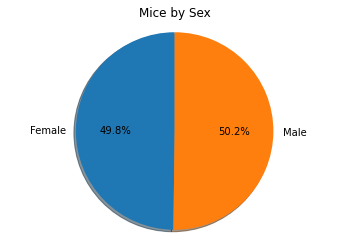

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Mice by Sex')
plt.pie(sex_count_df['Mouse ID'],labels=sex_count_df['Sex'],autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.show()




## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = merged.groupby('Mouse ID')
max_timepoint = mouse_group['Timepoint'].max()
max_df = pd.DataFrame(data=max_timepoint)
max_df = max_df.reset_index()
max_df = max_df.rename(columns={'Timepoint':'Max Timepoint'})
max_df.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(merged,max_df,on='Mouse ID')
merged.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

#Create a for loop
for drug in drug_list:
    drug_df = merged.loc[merged['Drug Regimen']== drug]
    tumor_df = drug_df.loc[drug_df['Timepoint']== drug_df['Max Timepoint']]
    volume = tumor_df['Tumor Volume (mm3)']
    tumor_vol.append(volume)

    #Calculate quartile data
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f'The IQR for {drug} : {round(iqr,2)}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Values below {round(lower_bound,2)} for {drug} coud be outliers')
    print(f'Values above {round(upper_bound,2)} for {drug} could be outliers')
    outliers = (volume.loc[(tumor_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (tumor_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'{drug} : {outliers} outliers')




The IQR for Capomulin : 7.78
Values below 20.7 for Capomulin coud be outliers
Values above 51.83 for Capomulin could be outliers
Capomulin : 0 outliers
The IQR for Ramicane : 9.1
Values below 17.91 for Ramicane coud be outliers
Values above 54.31 for Ramicane could be outliers
Ramicane : 0 outliers
The IQR for Infubinol : 11.48
Values below 36.83 for Infubinol coud be outliers
Values above 82.74 for Infubinol could be outliers
Infubinol : 1 outliers
The IQR for Ceftamin : 15.58
Values below 25.36 for Ceftamin coud be outliers
Values above 87.67 for Ceftamin could be outliers
Ceftamin : 0 outliers


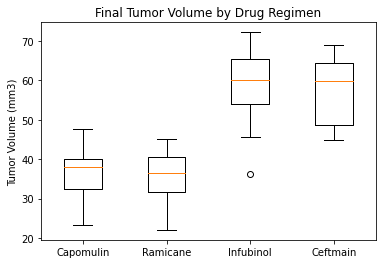

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftmain'])
plt.show()




## Line and Scatter Plots

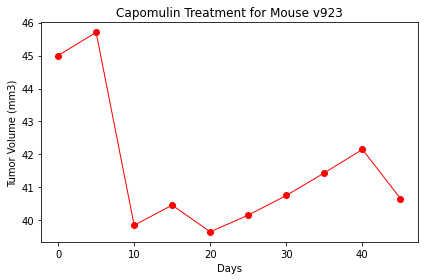

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = merged.loc[merged['Drug Regimen'] == 'Capomulin']
mouse_df = cap_df.loc[cap_df['Mouse ID'] == 'v923']
plt.plot(mouse_df['Timepoint'],mouse_df['Tumor Volume (mm3)'],marker='o',color='red',linewidth=1)
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for Mouse v923')
plt.tight_layout()
plt.show()



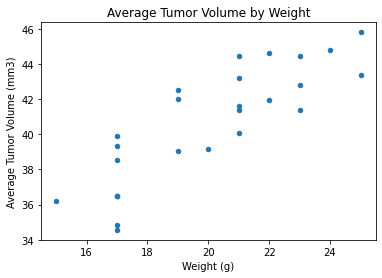

In [118]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_cap = cap_df.groupby('Mouse ID')
mouse_mean = mouse_cap['Tumor Volume (mm3)'].mean()
mouse_mean = mouse_mean.reset_index()
mouse_mean = pd.DataFrame(data=mouse_mean)
mouse_mean = mouse_mean.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_tumor = pd.merge(cap_df,mouse_mean,on='Mouse ID')
avg_tumor = avg_tumor[['Weight (g)','Average Tumor Volume']].drop_duplicates()
avg_tumor_chart = avg_tumor.plot(kind='scatter',x='Weight (g)',y='Average Tumor Volume', xlabel='Weight (g)',ylabel='Average Tumor Volume (mm3)',title='Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

In [119]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = avg_tumor['Weight (g)']
y = avg_tumor['Average Tumor Volume']
correlation = st.pearsonr(x,y)
print(f'The correlation between the two factors is {round(correlation[0],2)}')
print(f'The correlation is positive and strong')

The correlation between the two factors is 0.84
The correlation is positive and strong


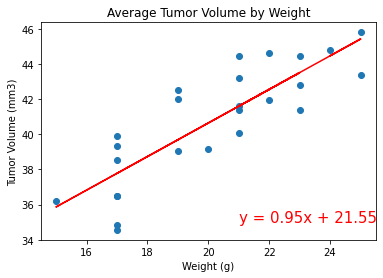

In [123]:
#Adding the linear regression model and line to our scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(21,35),fontsize=15,color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()